In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
#Importing downloaded dataset from Kaggle
dataset=pd.read_csv('../input/Skyserver_SQL2_27_2018 6_51_39 PM.csv',skiprows=1)

In [ ]:
#Getting the details of the dataset
dataset.info()

As we can see that there are 18 columns of which one is the target column and the rest are features.
But not all the features are equally important.
For example we do not need "objid" and "specobjid" as these columns were used as an index to the data.

http://www.sdss3.org/dr9/imaging/imaging_basics.php
This is the website where the explanation of the data is given.
From this website we can know that the columns run, camcol and field are required to know the condition in which the photo was taken.
Also it is stasted that the column rerun is used to tell us about how the image is processed.

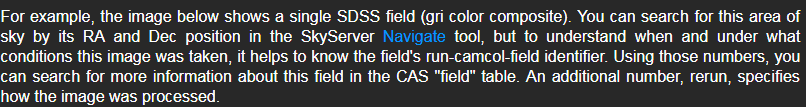

As there is no need for columns: objectid, specobjid, run, rerun, camcol and field we will drop them from the dataset.

In [ ]:
#Dropping unimportant fields
dataset=dataset.drop(columns=['objid','specobjid','run','rerun','camcol','field'])

In [ ]:
dataset.head()

In [ ]:
#For seeing the correlation between the target and the fearures we need to apply label encoder on the class column.
from sklearn.preprocessing import LabelEncoder
dataset=dataset.apply(LabelEncoder().fit_transform)
dataset.corr()

In [ ]:
#Getting X and y from the dataset
X=dataset.drop(columns=['class'])
y=dataset.iloc[:,7].values

In [ ]:
#Splitting the dataset into train and test data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [ ]:
#Using KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


In [ ]:
#Getting the accuracy of the model
accuracy=(y_pred==y_test).sum().astype(float) /len(y_test) *100
accuracy

In [ ]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dte=DecisionTreeClassifier()
dte.fit(X_train,y_train)
y_pred=dte.predict(X_test)

In [ ]:
#Getting the accuracy of the model
accuracy=(y_pred==y_test).sum().astype(float) /len(y_test) *100
accuracy

In [ ]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [ ]:
#Getting the accuracy of the model
accuracy=(y_pred==y_test).sum().astype(float) /len(y_test) *100
accuracy